In [0]:
# ライブラリのインポート
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [0]:
# 住宅価格データセットの読み込み
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')

df.columns=['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# 先頭5行の表示
pd.DataFrame(df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [0]:
# データフレームの形状
print('dfの形状', df.shape)

dfの形状 (506, 14)


In [0]:
# 特徴量に平均部屋数(RM)の20件を設定
X = df[:20][['RM']].values
# 正解に住宅価格(MDEV)の20件を設定
y = df[:20]['MEDV'].values

# 特徴量と正解の先頭5行を表示
X[:5], y[:5]

(array([[6.575],
        [6.421],
        [7.185],
        [6.998],
        [7.147]]), array([24. , 21.6, 34.7, 33.4, 36.2]))

In [0]:
# 特徴量と正解の形状
X.shape, y.shape

((20, 1), (20,))

In [0]:
# 線形回帰モデルを作成
model = LinearRegression()

# モデルの訓練
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
print('傾き: %.2f' % model.coef_)
print('切片: %.2f' % model.intercept_) 

傾き: 10.35
切片: -41.24


In [0]:
# モデルを使い、部屋数から住宅価格を予測
new_data = np.array([[6]])
model.predict(new_data)

array([20.86892399])

In [0]:
# 1次関数作成用に部屋数の変数X_pltを作成
X_plt = np.arange(5, 9, 1)
print('1次元配列のX_plt', X_plt)
# X_pltを2次元配列に変換
X_plt = np.arange(5, 9, 1)[:, np.newaxis]
print('2次元配列のX_plt',X_plt)

1次元配列のX_plt [5 6 7 8]
2次元配列のX_plt [[5]
 [6]
 [7]
 [8]]


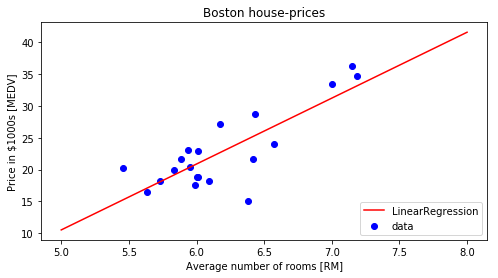

In [0]:
plt.figure(figsize=(8,4)) #プロットのサイズ指定

# モデルのプロット
y_pred = model.predict(X_plt)

# 部屋数と住宅価格の散布図と1次関数のプロット
plt.scatter(X, y, color='blue', label='data')
plt.plot(X_plt, y_pred, color='red', linestyle='-', label='LinearRegression')
plt.ylabel('Price in $1000s [MEDV]')
plt.xlabel('Average number of rooms [RM]')
plt.title('Boston house-prices')
plt.legend(loc='lower right')

plt.show()